# Determining Appropriate Funding Status of Current and Emerging Unicorn Companies

By Joseph Chiappetta, Zachary Hamann, Rohan Katakam, and Guy Santillo

# Project question(s)

* How do we determine the appropriate funding status of current and emerging unicorn companies?
* How do we determine if an emerging or current unicorn company is overvalued or undervalued? 

A company would be undervalued if it's current funding status is behind what our model predicts for it. For instance, if a company is currently a Early Stage Venture but our model classifies (evaluates) it as a Late Stage Venture, we would identify it as *undervalued*.

# Libraries used

## pandas
Used for data manipulation and analysis

In [61]:
import pandas as pd

## collections
Used to count number of values in datasets (using Counter subclass)

In [62]:
from collections import Counter

## numpy

Used for mathematical computation over large datasets

In [63]:
import numpy as np

## scikit-learn

Used for splitting data and creating machine learning models

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

## forex_python

Used for converting currencies (using CurrencyRates subclass)

In [65]:
from forex_python.converter import CurrencyRates

## re

Used for string manipulation

In [66]:
import re

# Review of Literature

Unicorn companies have immense growth potential and several high-profile VC investors (Peter Thiel, Marc Andreessen, Chris Sacca, etc.) have accumulated the majority of their wealth through investing in these companies at the right time. Identifying a unicorn company as undervalued may signal that it may be worth investing in.

The difficulty lies in producing an accurate valuation for privately-owned companies as described by BusinessBecause writer Imogen Brighty Potts (2021). “These high valuations are far from a guarantee of success. ‘These huge valuations are likely to be a very rough estimate, as unicorns are often focused on entirely new markets, technologies, or business models,’ explains James Hayton, a professor in innovation and organizational creativity at Warwick Business School in the UK. ‘Very high valuations are associated with equally high levels of risk.’ Another reason to be skeptical of the valuation of unicorns is that these figures are usually based on the success of similar companies. In theory, this comparison considers whether there’s a market for a startup’s products or services. But these comparisons can draw false equivalencies. They don’t take into account whether the startup is losing money and can lead to hugely inflated valuations that deceive investors.” Our approach uses Machine Learning to try to eliminate the inaccuracies in the high valuations that are given based on similar companies and the probability of success in a new market.

According to Chen (2022), a unicorn company is defined as "a privately held startup company with a value of over 1 billion dollars". Venture capitalist, Aileen Lee, coined this term in her 2013 article titled "Welcome to the Unicorn Club: Learning from Billion-Dollar Startups" where she looked at software companies that were founded in the 2000s and estimated that only 0.07$\%$ of these companies would be ever valued as over $1 billion. Some notable unicorn companies are Google, Meta, Uber, SpaceX, and Airbnb.

References
* Chen, J. (2022, March 29). What is a Unicorn in Business? Investopedia. Retrieved April 27, 
2022, from https://www.investopedia.com/terms/u/unicorn.asp#toc-unicorns-in-the-business-world 
* Potts, I. B. (2021, July 8). Startup Unicorns: Understanding Billion-Dollar Valuations. 
BusinessBecause. Retrieved April 27, 2022, from https://www.businessbecause.com/news/insights/7706/startup-unicorns-billion-dollar-valuations 


# Data

## Source

We collected data for current unicorns and for exited unicorns from [The Crunchbase Unicorn Board](https://news.crunchbase.com/unicorn-company-list/).

## Data dictionary

We combined the data for both current and exited unicorns into a uniform dataset. Here is the breakdown of the variables in the combined dataset:
<br>
<br>
<center>Independent (predictor) variables</center>

| Variable | Type | Description |
| ----------- | ----------- | ----------- |
| Name | Field Name | Name of company |
| Total_Equity_Funding | Numerical | Total funding amount raised across all Funding Rounds excluding debt |
| Valuation | Numerical | Valuation of company |
| Valuation_Date | DateTime | Date the company was given the valuation |
| Industries | Multi-Categorical | Pertaining industries of the company |
| Top_5_Investors | Multi-Categorical | The top 5 investors with investments in this company, ordered by Crunchbase Rank |
| Founded_Date | DateTime | Date the organization was founded |
| Last_Funding_Date | DateTime | Date of most recent Funding Round |
| Last_Funding_Amount | Numerical | Amount of most recent Funding Round |
| Number_Of_Acquisitions | Numerical | Total number of Acquisitions |
| CB_Rank | Numerical | Algorithmic rank assigned to the top 100,000 most active Companies |

<br>
<br>
<center>Possible dependent variables</center>

| Variable | Type | Description |
| ----------- | ----------- | ----------- |
| Last_Funding_Type | Categorical | Last funding round type (e.g. Seed, Series A, Private Equity) |
| Funding_Status | Categorical | An organization's most recent funding status (e.g. Early Stage Venture, Late Stage Venture, M&A) |

## Dependent variable selection

We chose **Funding Status** as our dependent variable because it had significantly less categories (6 compared to 23). Although Last Funding Type offers more detailed insight into the stage of the company in the funding process, Funding_Status provides a sufficient amount of information. Both variables have a hierarchy of categories.

The funding status of a company will fall into one of the following 6 categories according to our data:

| Hierarchy | Category | Description |
| ----------- | ----------- | ----------- |
| 1 | Seed | Categorical |
| 2 | Early Stage Venture | Categorical |
| 3 | Late Stage Venture | Categorical |
| 4 | Mergers & Acquisions (M&A) | Categorical |
| 5 | Private Equity | Categorical |
| 6 | Initial Public Offering (IPO) | Categorical |


**Last Funding Type** can fall in any of the following 23 different categories: Grant, Series D, Non-equity Assistance, Post-IPO Secondary, Convertible Note, Undisclosed, Series H, Equity Crowdfunding, Debt Financing, Series J, Private Equity, Series C, Series G, Secondary Market, Corporate Round, Series I, Series E, Series A, Seed, Series B, Series F, Post-IPO Debt, Post-IPO Equity, and Initial Coin Offering.

## Processing

### 1. Upload and parse raw data into DataFrame(s)

**Exited unicorns dataset (eu_df)**

Compiled data of unicorns that exited through Initial Public Offering (IPO) or Mergers & Acquisitions (M&A). Contains several well-known companies (Uber, Hulu, Coinbase, etc.)

In [67]:
exited_unicorns = pd.read_csv("exited_unicorns.csv")

In [68]:
eu_list = exited_unicorns["1"].str.split().str.join(' ').tolist()
eu_list.insert(0, '1')

In [69]:
data = []
for i in range(0, len(eu_list), 16):
    company = {
        "Name" : eu_list[i+1],
        "Headquarters_Location" : eu_list[i+2],
        "Total_Equity_Funding" : eu_list[i+3],
        "Valuation" : eu_list[i+4],
        "Valuation_Date" : eu_list[i+5],
        "Industries" : eu_list[i+6],
        "Top_5_Investors" : eu_list[i+7],
        "Founded_Date" : eu_list[i+8],
        "Funding_Status" : eu_list[i+9],
        "IPO_Status" : eu_list[i+10],
        "Last_Funding_Date" : eu_list[i+11],
        "Last_Funding_Amount" : eu_list[i+12],
        "Last_Funding_Type" : eu_list[i+13],
        "Number_Of_Acquisitions" : eu_list[i+14],
        "CB_Rank" : eu_list[i+15]
    }
    data.append(company)

eu_df = pd.DataFrame(data)

In [70]:
eu_df.head()

,Name,Headquarters_Location,Total_Equity_Funding,Valuation,Valuation_Date,Industries,Top_5_Investors,Founded_Date,Funding_Status,IPO_Status,Last_Funding_Date,Last_Funding_Amount,Last_Funding_Type,Number_Of_Acquisitions,CB_Rank
0,blinkit,"Gurgaon, Haryana, India","$798,259,135",—,—,"Delivery, E-Commerce, E-Commerce Platforms, Gr...","SoftBank, Zomato, Sequoia Capital India, Sequo...",27-Dec-13,M&A,Private,15-Mar-22,"$150,000,000",Debt Financing,2,8
1,Coinbase,"San Francisco, California, United States","$525,309,825","$86,000,000,000",14-Apr-21,"Bitcoin, Blockchain, Cryptocurrency, E-Commerc...","Junipero, Digital Currency Group, Blockchain C...",2012,IPO,Public,18-Jan-21,"$20,000,000",Secondary Market,21,23
2,Okta,"San Francisco, California, United States","$1,228,500,000","$1,500,000,000",6-Apr-17,"CRM, Enterprise Software, Identity Management,...","Junipero, Sequoia Capital, Andreessen Horowitz...",1-Jan-09,IPO,Public,8-Jun-20,"$1,000,000,000",Post-IPO Equity,6,24
3,Atlassian,"Sydney, New South Wales, Australia",—,"$4,400,000,000",10-Dec-15,"Collaboration, Enterprise Software, SaaS, Soft...","Accel, T. Rowe Price, Dragoneer Investment Gro...",2002,IPO,Public,8-Apr-14,"$150,000,000",Secondary Market,18,34
4,WeWork,"New York, New York, United States","$11,043,784,331","$9,000,000,000",21-Oct-21,"Commercial Real Estate, Coworking, Property De...","SoftBank, Goldman Sachs, Insight Partners, Bla...",2010,IPO,Public,29-Oct-21,"$150,000,000",Post-IPO Equity,21,37


In [71]:
eu_df[eu_df["Number_Of_Acquisitions"] == "—"].shape

(124, 15)

**Current unicorns dataset (u_df)**

Contains compiled data of current unicorn companies that have not exited. The companies are still in the process of VC funding (Series A-F). Contains less well-known companies with immense growth potential (ByteDance, Stripe, Instacart, etc.)

In [72]:
unicorns = pd.read_csv("unicorns.csv")

In [73]:
unicorns_list = unicorns["1"].str.split().str.join(' ').tolist()
unicorns_list.insert(0, '1')

In [74]:
data = []
for i in range(0, len(unicorns_list), 15):
    company = {
        "Name" : unicorns_list[i+1],
        "Headquarters_Location" : unicorns_list[i+2],
        "Total_Equity_Funding" : unicorns_list[i+3],
        "Valuation" : unicorns_list[i+4],
        "Valuation_Date" : unicorns_list[i+5],
        "Industries" : unicorns_list[i+6],
        "Top_5_Investors" : unicorns_list[i+7],
        "Founded_Date" : unicorns_list[i+8],
        "Funding_Status" : unicorns_list[i+9],
        "Last_Funding_Date" : unicorns_list[i+10],
        "Last_Funding_Amount" : unicorns_list[i+11],
        "Last_Funding_Type" : unicorns_list[i+12],
        "Number_Of_Acquisitions" : unicorns_list[i+13],
        "CB_Rank" : unicorns_list[i+14]
    }
    data.append(company)

u_df = pd.DataFrame(data)

In [75]:
u_df[u_df["Last_Funding_Type"] == "Venture - Series Unknown"]

,Name,Headquarters_Location,Total_Equity_Funding,Valuation,Valuation_Date,Industries,Top_5_Investors,Founded_Date,Funding_Status,Last_Funding_Date,Last_Funding_Amount,Last_Funding_Type,Number_Of_Acquisitions,CB_Rank
2,SpaceX,"Hawthorne, California, United States","$6,666,158,366","$100,300,000,000",8-Oct-21,"Aerospace, Manufacturing, Space Travel, Transp...","Junipero, Google, Fidelity, Baillie Gifford, B...",6-May-02,—,30-Dec-21,"$337,355,200",Venture - Series Unknown,1,296
6,Canva,"Sydney, New South Wales, Australia","$572,200,000","$40,000,000,000",14-Sep-21,"Graphic Design, Photo Editing, Publishing, Sof...","500 Startups, General Catalyst, T. Rowe Price,...",2012,—,14-Sep-21,"$200,000,000",Venture - Series Unknown,6,"3,273"
8,Instacart,"San Francisco, California, United States","$2,918,830,549","$39,000,000,000",2-Mar-21,"Delivery Service, E-Commerce, Grocery, Shopping","Sequoia Capital, Andreessen Horowitz, FundersC...",2012,—,1-Nov-21,"$232,000,000",Venture - Series Unknown,5,881
13,Epic Games,"Cary, North Carolina, United States","$7,110,000,000","$31,500,000,000",11-Apr-22,"Developer Platform, Gaming, Software, Video Games","Tencent, Baillie Gifford, T. Rowe Price, Brack...",1991,—,11-Apr-22,"$2,000,000,000",Venture - Series Unknown,18,246
18,Fanatics,"Jacksonville, Florida, United States","$4,115,000,000","$27,000,000,000",2-Mar-22,"Manufacturing, Retail, Sporting Goods, Sports","Silver Lake, Andreessen Horowitz, Neuberger Be...",2002,M&A,2-Mar-22,"$1,500,000,000",Venture - Series Unknown,7,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,Tarana Wireless,"Milpitas, California, United States","$376,142,157","$1,000,000,000",23-Mar-22,"Communications Infrastructure, Mobile, Wireless","K3 Ventures, Khosla Ventures, I Squared Capita...",2009,—,23-Mar-22,"$170,000,000",Venture - Series Unknown,—,333
977,Shippo,"San Francisco, California, United States","$154,275,000","$1,000,000,000",2-Jun-21,"B2B, E-Commerce, Logistics, Software, Supply C...","500 Startups, Plug and Play Tech Center, Funde...",2013,—,1-Dec-21,—,Venture - Series Unknown,—,334
992,Amagi Media Labs,"New York, New York, United States","$240,200,000","$1,000,000,000",16-Mar-22,"Advertising Platforms, B2B, Media and Entertai...","Norwest Venture Partners, Accel, PremjiInvest,...",2008,—,16-Mar-22,"$95,000,000",Venture - Series Unknown,—,659
993,Eat Just,"San Francisco, California, United States","$440,000,000","$1,000,000,000",23-Mar-21,"Biotechnology, Food and Beverage, Food Process...","Founders Fund, Vulcan Capital, Khosla Ventures...",2011,—,18-Nov-21,—,Venture - Series Unknown,—,671


### 2. Compare exited unicorns and current unicorns data

#### # of unique values

Exited unicorns dataset (eu_df)

In [76]:
eu_df.nunique()

Name                      391
Headquarters_Location     141
Total_Equity_Funding      377
Valuation                 223
Valuation_Date            259
Industries                387
Top_5_Investors           390
Founded_Date              170
Funding_Status              3
IPO_Status                  3
Last_Funding_Date         345
Last_Funding_Amount       169
Last_Funding_Type          21
Number_Of_Acquisitions     33
CB_Rank                   386
dtype: int64

Current unicorns dataset (u_df)

In [77]:
u_df.nunique()

Name                      999
Headquarters_Location     270
Total_Equity_Funding      892
Valuation                 344
Valuation_Date            489
Industries                964
Top_5_Investors           996
Founded_Date              316
Funding_Status              7
Last_Funding_Date         453
Last_Funding_Amount       317
Last_Funding_Type          20
Number_Of_Acquisitions     22
CB_Rank                   981
dtype: int64

### 3. Analyze potential dependent variables further (Last Funding Type and Funding Status)**

Last Funding Type - unique values in both eu_df and u_df

In [78]:
set(u_df["Last_Funding_Type"].unique()).union(set(eu_df["Last_Funding_Type"].unique()))

{'Convertible Note',
 'Corporate Round',
 'Debt Financing',
 'Equity Crowdfunding',
 'Grant',
 'Initial Coin Offering',
 'Non-equity Assistance',
 'Post-IPO Debt',
 'Post-IPO Equity',
 'Post-IPO Secondary',
 'Private Equity',
 'Secondary Market',
 'Seed',
 'Series A',
 'Series B',
 'Series C',
 'Series D',
 'Series E',
 'Series F',
 'Series G',
 'Series H',
 'Series I',
 'Series J',
 'Undisclosed',
 'Venture - Series Unknown'}

Last Funding Type - # of unique values in both eu_df and u_df

In [79]:
len(set(u_df["Last_Funding_Type"].unique()).union(set(eu_df["Last_Funding_Type"].unique())))

25

Funding Status - unique values in both eu_df and u_df

In [80]:
set(u_df["Funding_Status"].unique()).union(set(eu_df["Funding_Status"].unique()))

{'Early Stage Venture',
 'IPO',
 'Late Stage Venture',
 'M&A',
 'Private Equity',
 'Seed',
 '—'}

Funding Status - # of unique values in both eu_df and u_df

In [81]:
len(set(u_df["Funding_Status"].unique()).union(set(eu_df["Funding_Status"].unique())))

7

**Last Funding Type** and **Funding Status** are both promising dependent variables. We will train seperate classification models to analyze these dependent variables seperately. It is predicted that **Funding Status** will offer **higher model accuracy** because there are significantly less # of unique values (10 vs. 41). However, **Last_Funding_Type** still offers valuable insights.

### 4. Combine datasets

#### Remove IPO_Status from eu_df due to inconsistency between datasets

In [82]:
eu_df = eu_df.drop(columns=["IPO_Status"])

#### Confirm that the columns in both DataFrames are now equal

In [83]:
(u_df.columns) == (eu_df.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

#### Combine eu_df and u_df into a new DataFrame **all_df**

In [84]:
all_df = pd.concat([u_df, eu_df], axis=0)

In [85]:
all_df.shape

(1391, 14)

In [86]:
list(all_df.columns)

['Name',
 'Headquarters_Location',
 'Total_Equity_Funding',
 'Valuation',
 'Valuation_Date',
 'Industries',
 'Top_5_Investors',
 'Founded_Date',
 'Funding_Status',
 'Last_Funding_Date',
 'Last_Funding_Amount',
 'Last_Funding_Type',
 'Number_Of_Acquisitions',
 'CB_Rank']

### 5. Standardize data

#### Replace "— with 0 in Number_Of_Acquisitions

In [87]:
all_df["Number_Of_Acquisitions"] = all_df["Number_Of_Acquisitions"].replace("—", 0)

In [88]:
all_df

,Name,Headquarters_Location,Total_Equity_Funding,Valuation,Valuation_Date,Industries,Top_5_Investors,Founded_Date,Funding_Status,Last_Funding_Date,Last_Funding_Amount,Last_Funding_Type,Number_Of_Acquisitions,CB_Rank
0,ByteDance,"Shanghai, Shanghai, China","$8,105,000,000","$180,000,000,000",11-Dec-20,"Content, Data Mining, Internet, Social Media","Sequoia Capital, Goldman Sachs, Morgan Stanley...",Mar-12,Private Equity,11-Dec-20,"$2,000,000,000",Private Equity,12,949
1,Ant Group,"Hangzhou, Zhejiang, China","$18,500,000,000","$150,000,000,000",8-Jun-18,"Banking, Financial Services, FinTech, Payments","Silver Lake, Warburg Pincus, Sequoia Capital, ...",Oct-14,Late Stage Venture,1-Jan-21,—,Series E,5,"3,367"
2,SpaceX,"Hawthorne, California, United States","$6,666,158,366","$100,300,000,000",8-Oct-21,"Aerospace, Manufacturing, Space Travel, Transp...","Junipero, Google, Fidelity, Baillie Gifford, B...",6-May-02,—,30-Dec-21,"$337,355,200",Venture - Series Unknown,1,296
3,Shein,"Nanjing, Jiangsu, China","$2,053,426,604","$100,000,000,000",4-Apr-22,"E-Commerce, Fashion, Marketplace, Textiles","General Atlantic, Tiger Global Management, IDG...",2008,Late Stage Venture,4-Apr-22,"$1,500,000,000",Series F,1,23
4,Stripe,"San Francisco, California, United States","$2,235,000,000","$95,000,000,000",14-Mar-21,"Finance, FinTech, Mobile Payments, SaaS","Junipero, Google, Sequoia Capital, Andreessen ...",2010,—,14-Jul-21,—,Secondary Market,13,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Youdao,"Beijing, Beijing, China",—,"$1,600,000,000",24-Oct-19,"Big Data, Education, Information Services, Inf...","Legend Capital, VMS Asset Management, Muhua Ji...",2007,IPO,18-Apr-18,—,Series A,0,"165,285"
387,Lashou.com,"Beijing, Beijing, China","$165,000,000",—,—,"E-Commerce, Internet, Social","Norwest Venture Partners, GSR Ventures, Tenaya...",18-Mar-10,M&A,1-Mar-11,"$110,000,000",Series C,0,"172,184"
388,MiaSolé,"Santa Clara, California, United States","$216,400,000",—,—,"Clean Energy, Energy, Solar","Bessemer Venture Partners, Kleiner Perkins, Se...",2001,M&A,7-Mar-12,"$55,000,000",Debt Financing,0,"201,832"
389,ZeniMax,"Rockville, Maryland, United States","$469,900,000",—,—,"Computer, Gaming, Media and Entertainment","Providence Equity Partners, SBS, Ardsley Partn...",1999,M&A,6-Oct-10,"$150,000,000",Private Equity,2,"325,732"


#### Remove all rows with any blank columns

In [89]:
all_df = all_df.replace('—',np.nan).dropna(axis = 0, how = 'any')

**Remove all rows where Last_Funding_Type is "Venture - Series Unknown"**

In [90]:
all_df = all_df[all_df["Last_Funding_Type"] != "Venture - Series Unknown"]

**Remove all rows where Last_Funding_Type is "Undisclosed"**

In [91]:
all_df = all_df[all_df["Last_Funding_Type"] != "Undisclosed"]

**Convert currencies to USD**

In [92]:
def getRates(currencyMap):
    out = {}
    c = CurrencyRates()
    for currency in currencyMap.values():
        out[currency] = float(c.get_rate(currency, 'USD'))
    return out

In [93]:
currency = {
    "$" : "USD",
    "£" : "GBP",
    "C" : "CNY",
    "¥" : "JPY",
    "₩" : "KRW",
    "€" : "EUR",
    "₹" : "INR",
    "A" : "AUD",
    "H" : "HKD",
    "S" : "SGD",
    "I" : "IDR"
}

In [94]:
rates = getRates(currency)

In [95]:
rates

{'USD': 1.0,
 'GBP': 1.256137674595986,
 'CNY': 0.15178352846301177,
 'JPY': 0.007692869133639881,
 'KRW': 0.0007944464125543638,
 'EUR': 1.054,
 'INR': 0.0130707606835487,
 'AUD': 0.7170555820123818,
 'HKD': 0.1274439863124675,
 'SGD': 0.7246476452389138,
 'IDR': 6.888204570526327e-05}

In [96]:
for index, row in all_df.iterrows():
    for col in ["Total_Equity_Funding", "Valuation", "Last_Funding_Amount", "CB_Rank"]:
        if type(row[col]) == str:
            if col == "CB_Rank":
                raw = "".join(re.sub("[^0-9]", "", (row[col])).split())
                all_df.at[index, col]= int(raw)
            else:
                curSign = (row[col][0]) 
                rate = rates[currency[curSign]]
                raw = "".join(re.sub("[^0-9]", "", (row[col])).split())
                all_df.at[index, col]= float(raw) * rate

In [97]:
all_df[all_df["Name"] == "NIO"]

,Name,Headquarters_Location,Total_Equity_Funding,Valuation,Valuation_Date,Industries,Top_5_Investors,Founded_Date,Funding_Status,Last_Funding_Date,Last_Funding_Amount,Last_Funding_Type,Number_Of_Acquisitions,CB_Rank
10,NIO,"Shanghai, Shanghai, China",3497000000.0,38000000000.0,12-Sep-18,"Automotive, Autonomous Vehicles, Electric Vehi...","Tencent, Lenovo, Temasek Holdings, Hillhouse C...",Nov-14,IPO,29-Apr-20,1600000000.0,Post-IPO Equity,0,2464


In [98]:
all_df.head()

,Name,Headquarters_Location,Total_Equity_Funding,Valuation,Valuation_Date,Industries,Top_5_Investors,Founded_Date,Funding_Status,Last_Funding_Date,Last_Funding_Amount,Last_Funding_Type,Number_Of_Acquisitions,CB_Rank
0,ByteDance,"Shanghai, Shanghai, China",8105000000.0,180000000000.0,11-Dec-20,"Content, Data Mining, Internet, Social Media","Sequoia Capital, Goldman Sachs, Morgan Stanley...",Mar-12,Private Equity,11-Dec-20,2000000000.0,Private Equity,12,949
3,Shein,"Nanjing, Jiangsu, China",2053426604.0,100000000000.0,4-Apr-22,"E-Commerce, Fashion, Marketplace, Textiles","General Atlantic, Tiger Global Management, IDG...",2008,Late Stage Venture,4-Apr-22,1500000000.0,Series F,1,23
7,Checkout.com,"London, England, United Kingdom",1830000000.0,40000000000.0,12-Jan-22,"E-Commerce, FinTech, Payments, Transaction Pro...","Insight Partners, Tiger Global Management, Coa...",2012,Late Stage Venture,12-Jan-22,1000000000.0,Series D,3,5675
10,Databricks,"San Francisco, California, United States",3497000000.0,38000000000.0,31-Aug-21,"Analytics, Artificial Intelligence, Informatio...","Gaingels, Andreessen Horowitz, Microsoft, Insi...",2013,Late Stage Venture,31-Aug-21,1600000000.0,Series H,2,2464
11,Revolut,"London, England, United Kingdom",1705469790.0,33000000000.0,15-Jul-21,"Banking, Financial Services, FinTech, Mobile P...","Seedcamp, Tiger Global Management, SoftBank Vi...",2015,Late Stage Venture,11-Aug-21,5470000.0,Secondary Market,1,968


#### Standardize data types for each column

Independent (predictor) variables
* **Total_Equity_Funding** numerical
* **Valuation** numerical
* **Valuation_Date** datetime
* **Industries** categorical
* **Top_5_Investors** categorical
* **Founded_Date** datetime

* **Last_Funding_Date** datetime
* **Last_Funding_Amount** numerical
* **Number_Of_Acquisitions** numerical
* **CB_Rank** numerical

Possible dependent variable
* **Last_Funding_Type** categorical
* **Funding Status** categorical

In [99]:
all_df["Headquarters_Location"] = all_df["Headquarters_Location"].astype('category')

all_df["Total_Equity_Funding"] = all_df["Total_Equity_Funding"].astype('float')

all_df["Valuation"] = all_df["Valuation"].astype('float')

all_df["Valuation_Date"] = all_df["Valuation_Date"].astype('datetime64')

all_df["Industries"] = all_df["Industries"].astype('category')

all_df["Top_5_Investors"] = all_df["Top_5_Investors"].astype('category')

# Causes error on conversion
#all_df["Founded_Date"] = all_df["Founded_Date"].astype('datetime64')

all_df["Funding_Status"] = all_df["Funding_Status"].astype('category')

all_df["Last_Funding_Date"] = all_df["Last_Funding_Date"].astype('datetime64')

all_df["Last_Funding_Amount"] = all_df["Last_Funding_Amount"].astype('float')

all_df["Last_Funding_Type"] = all_df["Last_Funding_Type"].astype('category')

all_df["Number_Of_Acquisitions"] = all_df["Number_Of_Acquisitions"].astype('int')

all_df["CB_Rank"] = all_df["CB_Rank"].astype('int')

In [100]:
all_df.dtypes

Name                              object
Headquarters_Location           category
Total_Equity_Funding             float64
Valuation                        float64
Valuation_Date            datetime64[ns]
Industries                      category
Top_5_Investors                 category
Founded_Date                      object
Funding_Status                  category
Last_Funding_Date         datetime64[ns]
Last_Funding_Amount              float64
Last_Funding_Type               category
Number_Of_Acquisitions             int64
CB_Rank                            int64
dtype: object

We will omit Founded_Date in our models because it is unable to converted. We also don't expect it to be highly significant.

# Empirical application

## 1. Create train and test datasets

In [101]:
train, test = train_test_split(all_df, test_size=0.2)

In [102]:
len(train), len(test)

(762, 191)

In [103]:
X_tr = train[["Total_Equity_Funding", "Valuation", "Last_Funding_Amount", "Number_Of_Acquisitions", "CB_Rank"]]
y_tr = train[["Funding_Status"]]

In [104]:
X_test = test[["Total_Equity_Funding", "Valuation", "Last_Funding_Amount", "Number_Of_Acquisitions", "CB_Rank"]]
y_test = test[["Funding_Status"]]

## 2. Analyze predictor variables

**Look for multicollinearity**

In [105]:
X_tr.corr().style.background_gradient(cmap='coolwarm')

,Total_Equity_Funding,Valuation,Last_Funding_Amount,Number_Of_Acquisitions,CB_Rank
Total_Equity_Funding,1.000000,0.591349,0.744574,0.205746,-0.050735
Valuation,0.591349,1.000000,0.540979,0.201516,-0.092782
Last_Funding_Amount,0.744574,0.540979,1.000000,0.109666,-0.030848
Number_Of_Acquisitions,0.205746,0.201516,0.109666,1.000000,-0.086002
CB_Rank,-0.050735,-0.092782,-0.030848,-0.086002,1.000000


There is no significant multicollinearity

Choose to not drop any predictor variables

## 3. Create models

**Logistic Regression**

We thought the classification model was more appropriate than a regression model since we are looking for a qualitative outcome in our dependent variable: funding_status. The goal of the logistic regression was to determine what stage a unicorn company should be in: (Seed, Early Stage Venture, Late Stage Venture, Mergers & Acquisitions, Private Equity, and Initial Public Offering) based on the predictor variables (Total_Equity_Funding, Valuation, Valuation_Date, Industries, Top_5_Investors, Founded_Date, Last_Funding_Date, Last_Funding_Amount, Number_Of_Aquisitions, and CB_Rank). By using classification, we would be able to determine if a unicorn was overvalued or undervalued. For example, if the funding status for a unicorn is currently classified as an Early Stage Venture, but our model determined it should be classified as Late Stage Venture, then we would say that it is undervalued. This model can be used by venture capitalists to determine which companies have the high potential returns and low risk. It is worth noting that this was our least accurate model, as it was consistently beat out in accuracy (measured with score() function) by both the SVM model and random forests model. 

In [106]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_tr, y_tr)

/Users/rohankatakam/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rohankatakam/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Support Vector Machine (SVM)**

Another regression method we used is the Support Vector Machine (SVM) model. SVM is a supervised machine learning model that uses classification algorithms for two-group classification problems. Compared to other methods, there are two main advantages of using SVM: higher speed and better performance given a limited number of samples (in the thousands). Given these attributes, SVM is often a very fitting method for classification problems, which is why we chose to use this method. We found that this method consistently tested more accurately than the Logistic Regression, but not as accurate as the Random Forests model (accuracy measured with score() function). Overall, we made sure to weigh this model's classification heavily when interpreting our results, but it did not influence our interpretation as much as the Random Forests Model.

In [107]:
SVM = svm.SVC(decision_function_shape="ovo").fit(X_tr, y_tr)

/Users/rohankatakam/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Random Forest Classifier**

Random forests, bagging, and boosting are methods that grow multiple trees that are combined for a single prediction.  It’s important to note that the sample average of correlated observations has a higher variance than uncorrelated observations.  With that being said, random forests provide a lower variance when we take the average than bagging by decorrelating the trees.  Random forests use a random selection of predictors chosen from a full set of predictors, which is why our random forest model produces different accuracy using the score function.  Using a small number of predictors when there are large amounts of correlated predictors is helpful, which isn’t the case in our data.  Overall, random forests solve the problem of averaging correlated quantities by splitting with a subset of predictors.  This won’t consider strong predictors as much and gives more say to other predictors, which reduces variance and increases reliability of the model.

In [108]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_tr, y_tr)

/var/folders/jn/9jrxv2254hx_4qfsnyskzg4r0000gn/T/ipykernel_22403/3519194696.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_tr, y_tr)


## 4. Determine the most effective model

**Add classification to columns**

In [109]:
test["LR_Classification"] = LR.predict(X_test).tolist()
test["SVM_Classification"] = SVM.predict(X_test).tolist()
test["RF_Classification"] = RF.predict(X_test).tolist()

#### Ranking models (strongest to weakest)

**1. Random Forest**

Score

In [110]:
round(RF.score(X_test, y_test), 4)

0.5445

Unique values

In [111]:
test["RF_Classification"].unique()

array(['Private Equity', 'Late Stage Venture', 'IPO', 'M&A',
       'Early Stage Venture'], dtype=object)

Conclusion

* Highest score, but not significantly larger than SVM
* Classifies using all categories. This is by far the least narrow and the most effective model so far.

**2. SVM**

Score

In [112]:
round(SVM.score(X_test, y_test), 4)

0.5393

Unique values

In [113]:
test["SVM_Classification"].unique()

array(['Late Stage Venture', 'IPO'], dtype=object)

Conclusion

* Score is only slightly below RF's (highest)
* Only classifies as Late Stage Venture, IPO, or Early Stage Venture. This is still narrow.

**3. Logistic Regression**

Score

In [114]:
round(LR.score(X_test,y_test), 4)

0.534

Unique values

In [115]:
test["LR_Classification"].unique()

array(['Late Stage Venture', 'Early Stage Venture', 'IPO'], dtype=object)

Conclusion

* Score is well below other too models
* Only classifies as Late Stage Venture or IPO. This is very narrow.

# Interpretation

## Identify most undervalued companies with Random Forest Classifier model

Companies that are in Series A, but are classified as being a Late Stage Venture would fall into this category

In [116]:
undervalued = test[(test["Last_Funding_Type"] == "Series A") & (test["RF_Classification"] == "Late Stage Venture")]

In [117]:
undervalued

,Name,Headquarters_Location,Total_Equity_Funding,Valuation,Valuation_Date,Industries,Top_5_Investors,Founded_Date,Funding_Status,Last_Funding_Date,Last_Funding_Amount,Last_Funding_Type,Number_Of_Acquisitions,CB_Rank,LR_Classification,SVM_Classification,RF_Classification
74,Ping An Healthcare Management,"Shanghai, Shanghai, China",1.150000e+09,8.800000e+09,2018-02-03,"Health Care, Insurance, Medical","SoftBank Vision Fund, IDG Capital, SBI Group, ...",Jun-05,Early Stage Venture,2018-02-03,1.150000e+09,Series A,0,36034,Late Stage Venture,Late Stage Venture,Late Stage Venture
393,Jusda,"Shenzhen, Guangdong, China",3.642805e+08,2.580320e+09,2019-01-29,"Electronics, Logistics, Supply Chain Management","CICC, IDG Capital, Oriza Holdings, China Life ...",2014,Early Stage Venture,2019-01-29,3.642805e+08,Series A,0,28260,Late Stage Venture,Late Stage Venture,Late Stage Venture
741,Beta Technologies,"South Burlington, Vermont, United States",5.110000e+08,1.400000e+09,2021-05-18,"Aerospace, Air Transportation, CleanTech, Manu...","Fidelity Management and Research Company, Clim...",1-Apr-17,Early Stage Venture,2021-05-18,3.680000e+08,Series A,0,3949,Late Stage Venture,Late Stage Venture,Late Stage Venture
598,Wave Mobile Money,"Dakar, Dakar, Senegal",2.000000e+08,1.700000e+09,2021-09-07,"Financial Services, FinTech, Mobile Payments","Stripe, Founders Fund, Ribbit Capital, Partech...",1-Feb-18,Early Stage Venture,2021-09-07,2.000000e+08,Series A,0,2235,Late Stage Venture,Late Stage Venture,Late Stage Venture
699,ECARX,"Hangzhou, Zhejiang, China",3.943239e+08,1.517835e+09,2020-10-27,"Artificial Intelligence, Automotive, Informati...","SIG China (SIG Asia Investments), Baidu, Yangt...",4-May-16,Early Stage Venture,2021-02-25,2.000000e+08,Series A,0,3295,Late Stage Venture,Late Stage Venture,Late Stage Venture


**These are the most undervalued companies according to our model**

## Surface observations

* We identified 5 out of 191 companies in our test data as undervalued
* 3 out of 5 of the companies are headquartered in China
* 1 out of 5 of the companies are headquartered in the United States
* 1 out of 5 of the companies are headquartered in Africa

## Further analysis of results

### Find most common industry

In [118]:
all_industries = {}

for index, row in undervalued.iterrows():
    industries = row["Industries"].split(",")
    for i in range(len(industries)):
        industry = industries[i].strip()
        if industry in all_industries:
            all_industries[industry] += 1
        else:
            all_industries[industry] = 1

for key, value in sorted(all_industries.items(),
                        key=lambda item: item[1], reverse=True):
    print(key, value)

Health Care 1
Insurance 1
Medical 1
Electronics 1
Logistics 1
Supply Chain Management 1
Aerospace 1
Air Transportation 1
CleanTech 1
Manufacturing 1
Financial Services 1
FinTech 1
Mobile Payments 1
Artificial Intelligence 1
Automotive 1
Information Services 1
Software 1


**The industries found are completely unique!**

### Find most common (Top 5) investor

In [119]:
all_investors = {}

for index, row in undervalued.iterrows():
    investors = row["Top_5_Investors"].split(",")
    for i in range(len(investors)):
        investor = investors[i].strip()
        if investor in all_investors:
            all_investors[investor] += 1
        else:
            all_investors[investor] = 1

for key, value in sorted(all_investors.items(),
                        key=lambda item: item[1], reverse=True):
    print(key, value)

IDG Capital 2
SoftBank Vision Fund 1
SBI Group 1
Hermitage Equity Partners 1
CICC 1
Oriza Holdings 1
China Life Insurance 1
TI Capital 1
Fidelity Management and Research Company 1
Climate Pledge Fund 1
RedBird Capital Partners 1
Stripe 1
Founders Fund 1
Ribbit Capital 1
Partech 1
Sam Altman 1
SIG China (SIG Asia Investments) 1
Baidu 1
Yangtze River Industry Fund 1
Hangzhou Trust 1
China Reform Holdings Corporation 1


**IDG Capital is the only investor that appeared twice**

## Distributions

### Histrograms

array([[<AxesSubplot:title={'center':'Total_Equity_Funding'}>,
        <AxesSubplot:title={'center':'Valuation'}>],
       [<AxesSubplot:title={'center':'Last_Funding_Amount'}>,
        <AxesSubplot:>]], dtype=object)

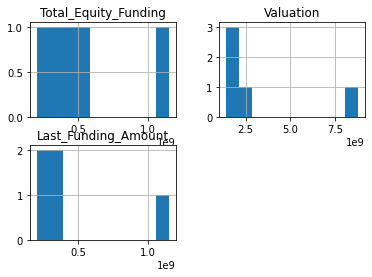

In [120]:
undervalued.hist(column=["Total_Equity_Funding", "Valuation", "Last_Funding_Amount"] )

The data is well-distributed.

## Final conclusions

As seen above, we created multiple models and identified one as better than the others. We were able to successfully identify undervalued companies (according to our model) in our test dataset. With these results, we can do further research into these companies using qualitative analysis to decide if we would like to personally invest in them.